# TarXiv API Basics

The main goal of this notebook is to try out and showcase the basic functionalities of the TarXiv API.

### 0. Set up

In [17]:
import requests
import pandas as pd
import yaml

Get the **HOST IP ADDRESS**, **API PORT** and **TOKEN** from the ``config.yml`` (not on GitHub, only showing a template).

In [35]:
with open('./config.yml') as myfile:
    config = yaml.safe_load(myfile)


API_URL = f"http://{config['host']}:{config['api_port']}"
TOKEN = config['token']

# 1. Get some data, any data...

TarXiv has **two classes** of documents, the **meta** (or contextual) data and the **lightcurve** data.
Before we can grab some of that data we need to find a transient that exists in our database. So
**let's get the full list of transients in our database**.

*[In future this may be too many so add a condition or something]*


## 1.1 Use a relaxed peak mag condition in the payload to get all the data 

First we have to define our **JSON payload**.

### Some definition if you need them
* __*payload*__: That's all the information we want to transmit through the API. It'll contain your credentials (e.g. token, the thing that tells the server you're allowed to perform this action), and other bits of data you need to provide for a given "end-point".

* __*end-point*__: A specific "location" we're connecting to in the API. For example here you'll see the `search_objects` end-point, which allows you to search for objects, or the `get_object_lc` which allows you to grab lightcurve information. They're called *end-points* because there beginning of the URL doesn't change (see below), but the last part tells the API what information you're looking for and therefore what information you are transmitting through your payload. 

* __*JSON*__: A file format full of brackets, super common for sharing information to and from servers. 

In [36]:

# --- Define our search payload in JSON format ----
# picked anything with magnitude brighter than 25 which is everything. 
payload = {
    "token": TOKEN,
    "search": {
        "peak_mag": [
            {
                  "operator": "<",
                  "value": 25
            }
        ]
    }
}



Then we create our request. For searching for obejcts, getting meta data and getting lightcurve we use **POST**. 

In [39]:
# --- Send POST request ---
search_url = f"{API_URL}/search_objects"
response = requests.post(search_url, json=payload)

We get the data back from the server as a JSON document (althought in this case it looks like a list???)

In [40]:
response.json()

['1997bs',
 '2014ib',
 '2017abr',
 '2018mpi',
 '2018mpj',
 '2018mpk',
 '2018mpl',
 '2018mpm',
 '2020afio',
 '2020nkz',
 '2021gqu',
 '2022aeyy',
 '2022aeyz',
 '2024abby',
 '2024ablj',
 '2024afpl',
 '2024aigb',
 '2024aigc',
 '2024zxj',
 '2025asm',
 '2025atx',
 '2025cbj',
 '2025dda',
 '2025efb',
 '2025emd',
 '2025eux',
 '2025ezt',
 '2025fca',
 '2025ghd',
 '2025gjc',
 '2025gsa',
 '2025gxf',
 '2025gyg',
 '2025gyi',
 '2025hch',
 '2025hda',
 '2025hjm',
 '2025hlf',
 '2025hmc',
 '2025hpa',
 '2025hpl',
 '2025hsr',
 '2025hte',
 '2025hxl',
 '2025hxt',
 '2025hzd',
 '2025iah',
 '2025ibx',
 '2025idz',
 '2025ieh',
 '2025ihl',
 '2025ihm',
 '2025iic',
 '2025iik',
 '2025ijj',
 '2025ikg',
 '2025ikl',
 '2025ikn',
 '2025imr',
 '2025imw',
 '2025ino',
 '2025inr',
 '2025iqb',
 '2025iqz',
 '2025irc',
 '2025ius',
 '2025ivc',
 '2025ivo',
 '2025iwa',
 '2025iwh',
 '2025iww',
 '2025ixf',
 '2025ixj',
 '2025ixm',
 '2025iyj',
 '2025izg',
 '2025izs',
 '2025jae',
 '2025jah',
 '2025jak',
 '2025jar',
 '2025jbm',
 '2025jnz'

It's unweildy and we can put it in a **pandas DataFrame**

In [42]:
transient_names = pd.DataFrame(response.json(),  columns=['tarxiv_id'])
transient_names

,tarxiv_id
0,1997bs
1,2014ib
2,2017abr
3,2018mpi
4,2018mpj
...,...
1137,2025nep
1138,2025pb
1139,2025pp
1140,2025qr



## 1.2 Let's get the metadata and lightcurve for 2025ug


In [43]:
OBJ_NAME = "2025ug"

# we make the urls to grab our object, we have the BASE+ENDPOINT+OBJECT_NAME
# The base is our host:port, the endpoint is the action we want to perform 
# and the obejct name is which objec we want it for
meta_url = f"{API_URL}/get_object_meta/{OBJ_NAME}"
lc_url = f"{API_URL}/get_object_lc/{OBJ_NAME}"

# The payload is the same for both getting the metadata and lightcurve in this case as I'm putting no restrictions
# on the lightcurve, so all we need is the token so we can get authenticated. 
payload = {"token": TOKEN}

In [44]:
meta_request = requests.post(url = meta_url, json=payload)
lc_request = requests.post(url = lc_url, json=payload)

### The Metadata/Contextual information

In [28]:
meta_request.json()

{'schema': 'https://github.com/astrocatalogs/schema/README.md',
 'sources': [{'name': 'tns',
   'bibcode': '2021AAS...23742305G',
   'reference': 'Gal-Yam et al. 2021',
   'alias': 0},
  {'name': 'ztf_survey',
   'bibcode': '2019PASP..131a8002B',
   'reference': 'Belim et al. 2019',
   'alias': 3},
  {'name': 'fink',
   'bibcode': '2021MNRAS.501.3272M',
   'reference': 'Möller et al. 2020',
   'alias': 4},
  {'name': 'mangrove',
   'bibcode': '2020MNRAS.492.4768D',
   'reference': 'Ducoin et al. 2020',
   'alias': 8}],
 'identifiers': [{'name': '2025ug', 'source': 0},
  {'name': 'ZTF25aaayywb', 'source': 3}],
 'ra_deg': [{'value': 160.126969, 'source': 0},
  {'value': 160.1269316, 'source': 3}],
 'dec_deg': [{'value': -4.9911825, 'source': 0},
  {'value': -4.9911522, 'source': 3}],
 'ra_hms': [{'value': '10:40:30.473', 'source': 0}],
 'dec_dms': [{'value': '-04:59:28.26', 'source': 0}],
 'object_type': [{'value': 'TDE', 'source': 0}, {'value': 'TDE', 'source': 0}],
 'discovery_date': [

### The Lightcurve

Again we can put our json data into a dataframe for convenience

In [47]:
lc_df = pd.DataFrame(lc_request.json())

In [48]:
lc_df

,mag,mag_err,filter,limit,mjd,unit,survey
0,20.036995,0.136866,g,20.318216,60726.341412,main,ZTF
1,19.984947,0.161199,R,20.259525,60726.333762,main,ZTF
2,19.597359,0.206609,R,19.493885,60716.348819,main,ZTF
3,19.643179,0.164901,R,20.000030,60699.461076,main,ZTF
4,19.260962,0.161061,g,19.866110,60699.376018,main,ZTF
5,19.413795,0.162979,g,19.780148,60694.378912,main,ZTF
6,20.224201,0.210437,g,20.159380,60681.400093,main,ZTF


Let's make a plot!

In [31]:
lc_df['filter'].unique()

array(['g', 'R'], dtype=object)

In [32]:
filter2col = {'g': 'green',
              'R': 'red'
             }

In [33]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'MJD')

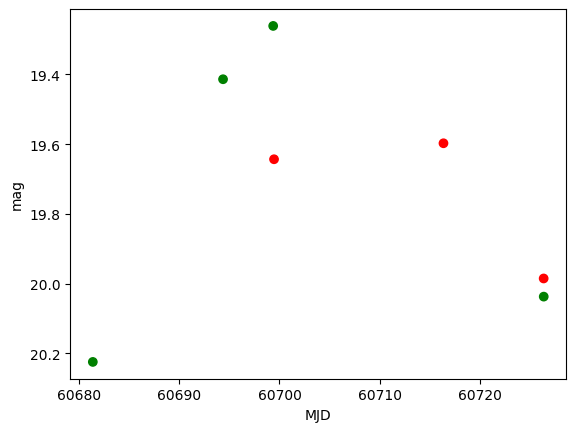

In [49]:
plt.scatter(lc_df['mjd'], lc_df['mag'], color=[filter2col[band] for band in lc_df['filter'].values])
plt.gca().invert_yaxis()
plt.ylabel('mag')
plt.xlabel('MJD')

# 2. Getting Specific data

Let's try to constrain our data more, this time we're going to use **both the peak magnitude and the redshift**.

* `peak_mag` brighter than 16
* `redshift` higher than 0.1

In [72]:

# --- Define our search payload in JSON format ----
# picked anything with magnitude brighter than 25 which is everything. 
payload = {
    "token": TOKEN,
    "search": {
        "peak_mag": [
            {
                  "operator": "<",
                  "value": 16
            }
        ],
        
        "redshift":[
            {
                "operator": ">",
                "value": 0.1
            }
            
        ]
    }
}

In [73]:
response = requests.post(search_url, json=payload)
pd.DataFrame(response.json(),  columns=['tarxiv_id'])

,tarxiv_id
0,2025lxx


And here we've got one!

### TODO: Have other common queries shown here